## Finite Element Analysis (FEA) Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:


# Define a simple triangular mesh
nodes = np.array([
    [0, 0], [1, 0], [2, 0],
    [0, 1], [1, 1], [2, 1],
    [0, 2], [1, 2], [2, 2]
])

elements = np.array([
    [0, 1, 3], [1, 4, 3],
    [1, 2, 4], [2, 5, 4],
    [3, 4, 6], [4, 7, 6],
    [4, 5, 7], [5, 8, 7]
])

# Apply a simple displacement field (simulating deformation)
displacement = np.array([
    [0.0, 0.0], [0.1, 0.0], [0.2, 0.0],
    [0.0, 0.1], [0.1, 0.2], [0.2, 0.1],
    [0.0, 0.2], [0.1, 0.3], [0.2, 0.2]
])

# Compute deformed mesh
deformed_nodes = nodes + displacement


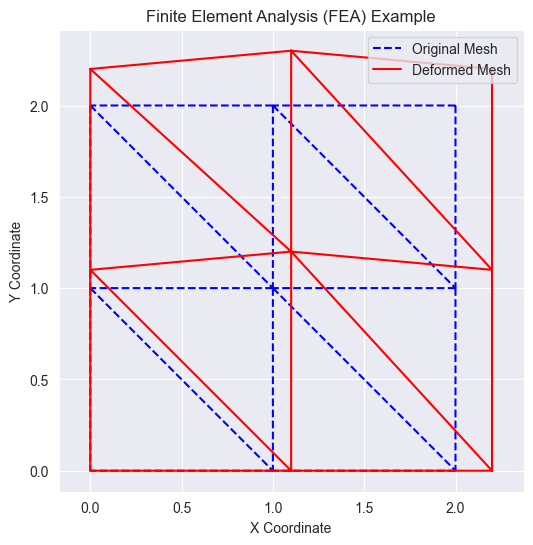

In [3]:

# Plot the original and deformed mesh
fig, ax = plt.subplots(figsize=(6, 6))
ax.triplot(nodes[:, 0], nodes[:, 1], elements, color='blue', linestyle='dashed', label="Original Mesh")
ax.triplot(deformed_nodes[:, 0], deformed_nodes[:, 1], elements, color='red', label="Deformed Mesh")

# Labels and Title
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
ax.set_title("Finite Element Analysis (FEA) Example")
ax.legend()
ax.axis('equal')

plt.show()